<a href="https://colab.research.google.com/github/Prashanna-Raj-Pandit/Datamining/blob/main/datamining_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Function to compute the median from grouped data
def grouped_median(class_intervals, frequencies):
    # Compute total frequency
    N = sum(frequencies)
    N_half = N / 2

    # Compute cumulative frequencies
    cumulative_frequencies = [sum(frequencies[:i+1]) for i in range(len(frequencies))]

    # Identify the median class
    for i, cum_freq in enumerate(cumulative_frequencies):
        if cum_freq >= N_half:
            median_class_index = i
            break

    # Extract median class details
    L = class_intervals[median_class_index][0]  # Lower boundary
    F = cumulative_frequencies[median_class_index - 1] if median_class_index > 0 else 0
    f = frequencies[median_class_index]
    h = class_intervals[median_class_index][1] - class_intervals[median_class_index][0]  # Class width

    # Compute median using the formula
    median = L + ((N_half - F) / f) * h
    return median

# Data: Class Intervals and Frequencies
class_intervals = [(1, 5), (6, 15), (16, 20), (21, 50), (51, 80), (81, 110)]
frequencies = [200, 450, 300, 1500, 700, 44]

# Calculate the median
median_value = grouped_median(class_intervals, frequencies)
print(f"Approximate Median: {median_value:.2f}")


Approximate Median: 33.51


Age - Mean: 46.44, Median: 51.0, Std Dev: 13.22, Q1: 39.5, Q3: 56.75, IQR: 17.25
Body Fat - Mean: 28.78, Median: 30.7, Std Dev: 9.25, Q1: 26.675, Q3: 33.925, IQR: 7.2499999999999964


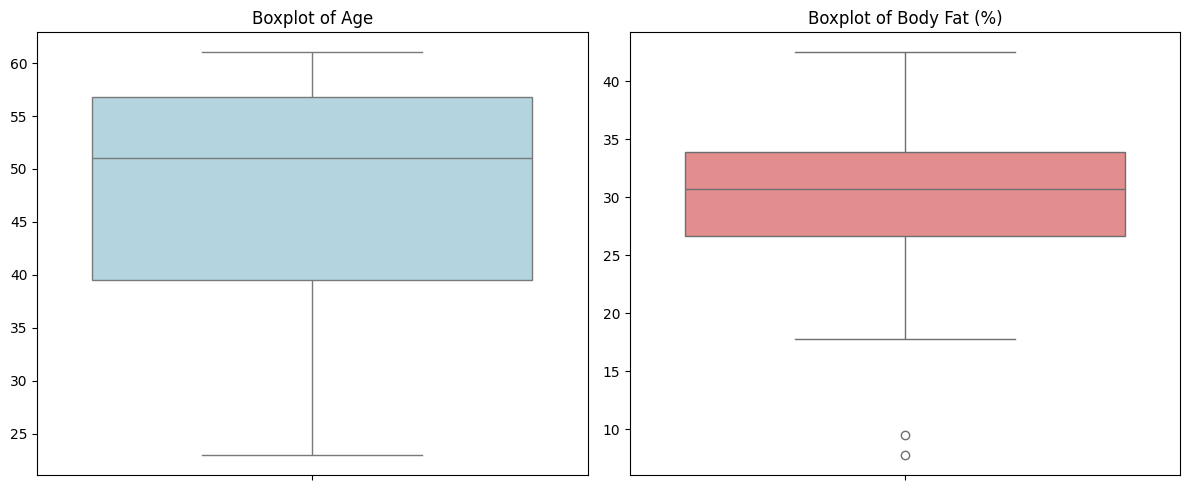

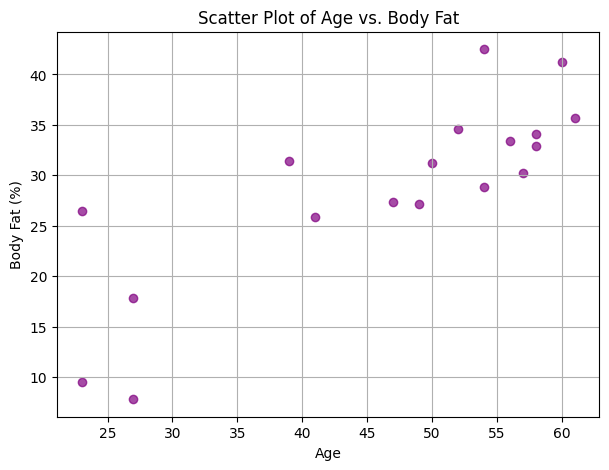

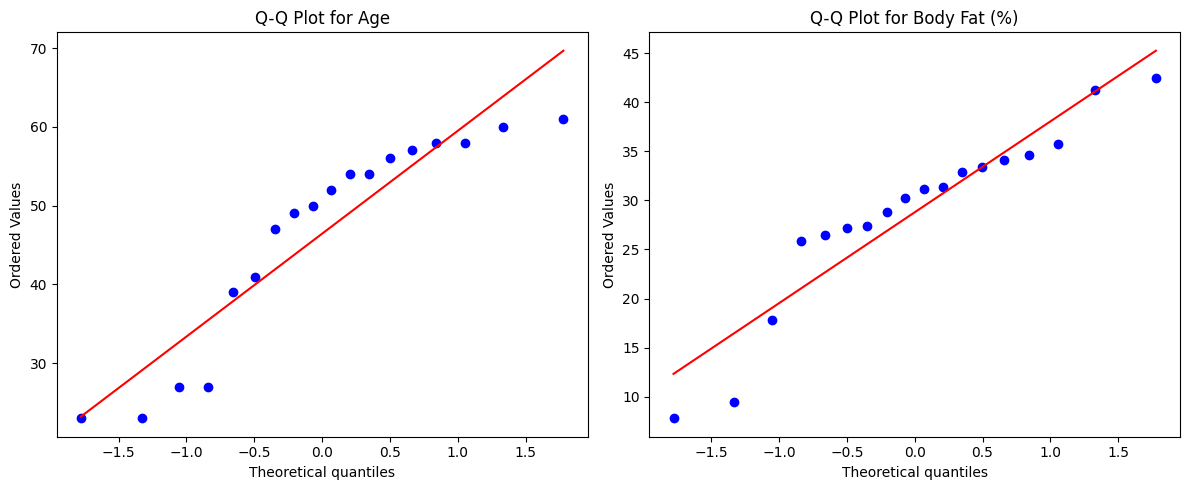

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Given data
ages = np.array([23, 23, 27, 27, 39, 41, 47, 49, 50, 52, 54, 54, 56, 57, 58, 58, 60, 61])
body_fat = np.array([9.5, 26.5, 7.8, 17.8, 31.4, 25.9, 27.4, 27.2, 31.2,
                     34.6, 42.5, 28.8, 33.4, 30.2, 34.1, 32.9, 41.2, 35.7])

# Calculate mean, median, standard deviation, Q1, Q3, and IQR
age_mean, age_median, age_std = np.mean(ages), np.median(ages), np.std(ages,ddof=1)
fat_mean, fat_median, fat_std = np.mean(body_fat), np.median(body_fat), np.std(body_fat,ddof=1)

age_Q1, age_Q3 = np.percentile(ages, 25), np.percentile(ages, 75)
fat_Q1, fat_Q3 = np.percentile(body_fat, 25), np.percentile(body_fat, 75)

age_IQR, fat_IQR = age_Q3 - age_Q1, fat_Q3 - fat_Q1

# Print statistics
print(f"Age - Mean: {age_mean:.2f}, Median: {age_median}, Std Dev: {age_std:.2f}, Q1: {age_Q1}, Q3: {age_Q3}, IQR: {age_IQR}")
print(f"Body Fat - Mean: {fat_mean:.2f}, Median: {fat_median}, Std Dev: {fat_std:.2f}, Q1: {fat_Q1}, Q3: {fat_Q3}, IQR: {fat_IQR}")

# Plot Boxplots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=ages, color='lightblue')
plt.title("Boxplot of Age")

plt.subplot(1, 2, 2)
sns.boxplot(y=body_fat, color='lightcoral')
plt.title("Boxplot of Body Fat (%)")

plt.tight_layout()
plt.show()

# Scatter plot (Age vs. Body Fat %)
plt.figure(figsize=(7, 5))
plt.scatter(ages, body_fat, color='purple', alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Body Fat (%)")
plt.title("Scatter Plot of Age vs. Body Fat")
plt.grid()
plt.show()

# Q-Q plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
stats.probplot(ages, dist="norm", plot=plt)
plt.title("Q-Q Plot for Age")

plt.subplot(1, 2, 2)
stats.probplot(body_fat, dist="norm", plot=plt)
plt.title("Q-Q Plot for Body Fat (%)")

plt.tight_layout()
plt.show()


## Method- II: q-q plot on two variables
To compare the distributions of two variables (e.g., age and %fat) to see if they come from the same distribution.

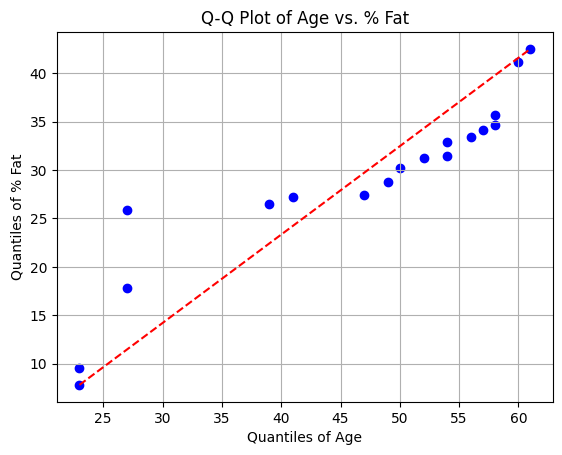

In [6]:
age_sorted = np.sort(ages)
fat_sorted = np.sort(body_fat)

# Calculate quantiles
quantiles = np.linspace(0, 100, len(ages))  # Generate percentiles (0% to 100%)

# Plot the Q-Q plot
plt.scatter(age_sorted, fat_sorted, color='blue')
plt.plot([min(age_sorted), max(age_sorted)], [min(fat_sorted), max(fat_sorted)], color='red', linestyle='--')  # Reference line
plt.title("Q-Q Plot of Age vs. % Fat")
plt.xlabel("Quantiles of Age")
plt.ylabel("Quantiles of % Fat")
plt.grid(True)
plt.show()

In [7]:
import numpy as np
from scipy.spatial.distance import euclidean, cityblock, chebyshev, cosine

# Given dataset
data = np.array([
    [1.5, 1.7],
    [2.0, 1.9],
    [1.6, 1.8],
    [1.2, 1.5],
    [1.5, 1.0]
])

# Query point
query = np.array([1.4, 1.6])

# Compute distances and similarity
euclidean_distances = [euclidean(point, query) for point in data]
manhattan_distances = [cityblock(point, query) for point in data]
supremum_distances = [chebyshev(point, query) for point in data]
cosine_similarities = [1 - cosine(point, query) for point in data]  # Higher is more similar

# Rank points based on similarity
def rank_points(distances, ascending=True):
    return np.argsort(distances) if ascending else np.argsort(distances)[::-1]

euclidean_rank = rank_points(euclidean_distances)
manhattan_rank = rank_points(manhattan_distances)
supremum_rank = rank_points(supremum_distances)
cosine_rank = rank_points(cosine_similarities, ascending=False)  # Higher value = more similar

# Display ranking
print("Ranking based on different similarity measures:")
print(f"Euclidean Distance: {euclidean_rank + 1}")
print(f"Manhattan Distance: {manhattan_rank + 1}")
print(f"Supremum Distance: {supremum_rank + 1}")


def cosine_similarity(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)

# Compute cosine similarity for each data point
cosine_similarities = [cosine_similarity(point, query) for point in data]
print(f"\nCosine Similarity: {cosine_similarities}")
print(f"Cosine Similarity rank: {cosine_rank + 1}")

# ---- Part (b): Normalize the dataset ----
normalized_data = data / np.linalg.norm(data, axis=1, keepdims=True)

# Compute Euclidean distance on normalized data
normalized_euclidean_distances = [euclidean(point, query) for point in normalized_data]
normalized_rank = rank_points(normalized_euclidean_distances)

print(f"\nRanking after normalization (using Euclidean distance): {normalized_rank + 1}")


Ranking based on different similarity measures:
Euclidean Distance: [1 4 3 5 2]
Manhattan Distance: [1 4 3 5 2]
Supremum Distance: [1 4 3 2 5]

Cosine Similarity: [0.999991391443956, 0.9957522612528874, 0.9999694838187877, 0.9990282349375618, 0.9653633930282662]
Cosine Similarity rank: [1 3 4 2 5]

Ranking after normalization (using Euclidean distance): [1 3 4 2 5]
